# Challenge 3: Linear Regression

To complete this challenge:


1.   Use the Adventure Works Cycles customer data you worked with in challenge 1 and 2 to create a regression model that **predicts** a customer's **average monthly spend**. The model should predict average monthly spend for new customers for whom no information about average monthly spend or previous bike purchases is available.

2.   Download the test data. This is the same test data that you have used in classification challenge. This data includes customer features but does not include bike purchasing or average monthly spend values.

3.   Use your model to predict on the corresponding test dataset. Don't forget to apply what you've learned throughout this course.

## Meeting Challenge 3



First we upload necessary packages and data for Linear Regression:

In [2]:
#our packages
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import scipy.stats as ss
import math

%matplotlib inline

#our data
Features = pd.read_csv('https://raw.githubusercontent.com/CeeThinwa/DataScienceLearning/master/AW_Features.csv')
TestFeatures = pd.read_csv('https://raw.githubusercontent.com/CeeThinwa/DataScienceLearning/master/AW_PreppedTestData.csv')
AverageMonthlySpend = pd.read_csv('https://raw.githubusercontent.com/CeeThinwa/DataScienceLearning/master/AW_AveMonthSpend.csv')

#drop automatic index columns that come with pd dataframes
Features = Features.drop('Unnamed: 0', axis = 1)

print(Features.shape)
print(TestFeatures.shape)
print(AverageMonthlySpend.shape)

(16519, 20)
(500, 20)
(16519, 2)


Average Monthly Spend is skewed as shown by the histogram below; therefore, it has to be converted to log values, and saved to Excel, ready for upload.

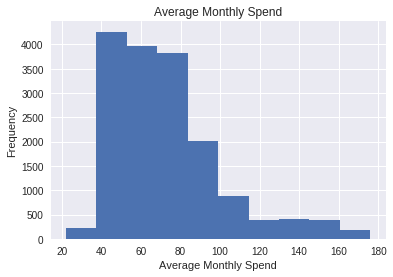

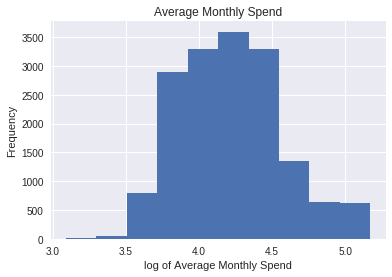

In [3]:
#Let's first plot a histogram
plt.hist(AverageMonthlySpend['AveMonthSpend'], bins = 10)
plt.xlabel('Average Monthly Spend')
plt.ylabel('Frequency')
plt.title('Average Monthly Spend')
plt.show()

#Then we normalize the distribution by converting the values to logs
AverageMonthlySpend['log_AveMonthSpend'] = np.log(AverageMonthlySpend['AveMonthSpend'])


#How are the log values distributed?
plt.hist(AverageMonthlySpend['log_AveMonthSpend'], bins = 10)
plt.xlabel('log of Average Monthly Spend')
plt.ylabel('Frequency')
plt.title('Average Monthly Spend')
plt.show()

In [4]:
LogLabel = AverageMonthlySpend['log_AveMonthSpend']

print(LogLabel.shape)
print(Features.shape)
print(TestFeatures.shape)

#now that we have our LogLabel, we can save to Excel
from google.colab import files
LogLabel.to_excel('AW_LogLabel.xlsx')

#files.download('AW_LogLabel.xlsx')#

(16519,)
(16519, 20)
(500, 20)


Next we scale the data:

In [5]:
scaler = preprocessing.StandardScaler().fit(Features.iloc[:,19:])
Features.iloc[:,19:] = scaler.transform(Features.iloc[:,19:])
TestFeatures.iloc[:,19:] = scaler.transform(TestFeatures.iloc[:,19:])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


Now we can use the Linear Regression model to solve our problem. We make our intercept 0 due to the coefficients of the dummy variables

In [6]:
#define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(Features, LogLabel)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

From our model, our coefficients and intercept were as follows:

In [7]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 7.95974063e-03 -1.12246228e-02  1.26848401e-01  6.44276737e-03
  2.54280545e-06 -2.10177208e-03  1.52239187e+00  1.44181848e+00
  1.68081528e+00  1.28339508e+00  6.03380027e-01  5.76073161e-01
  5.93758035e-01  5.99661409e-01  5.91337722e-01  5.39630487e-01
  5.23147778e-01  5.08869908e-01  5.60438027e-01  2.38412581e-01]


Now we can find our scores! They are as follows:

In [0]:
TestFeatures = np.array(TestFeatures)
Reg_Answers = lin_mod.predict(TestFeatures)

We have our scores, but they are the log values of Average Monthly Spend, so let's undo all that to get the actual values.

In [9]:
Label =  np.exp(Reg_Answers)
Label = pd.DataFrame(Label)

#save to Excel
from google.colab import files
Label.to_excel('RegressionAnswers.xlsx')

#files.download('RegressionAnswers.xlsx')#

Label.head(500)

,0
0,46.291201
1,106.912253
2,49.897999
3,87.320972
4,55.800985
5,46.476474
6,93.169249
7,136.948834
8,97.871906
9,55.789967
